# Cells

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from PIL import ImageEnhance

from imagemks.rw import rwformat
from imagemks.workflows import segment_fluor_cells, measure_fluor_cells, visualize_fluor_cells
from imagemks.workflows import default_parameters

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Setting up the parameters and loaders

In [3]:
path_to_data = '/home/sven/Projects/data/cells/'
zoomLev = 2
p = default_parameters('muscle')

In [4]:
nucs_loader = rwformat(path_to_data, prefix='b', ftype='.jpg')
cyto_loader = rwformat(path_to_data, prefix='g', ftype='.jpg')

## Loading the original images

In [5]:
n = 12

N = nucs_loader[n]
C = cyto_loader[n]

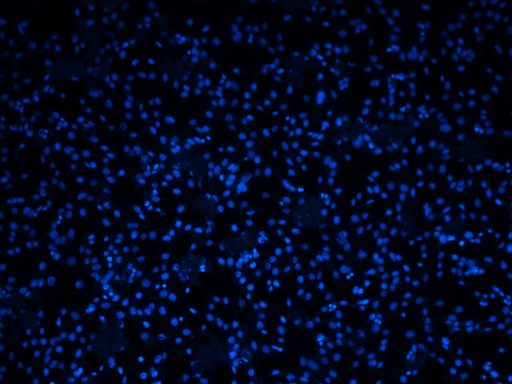

In [6]:
small_size = [i//5 for i in N.size]

N.resize(small_size)

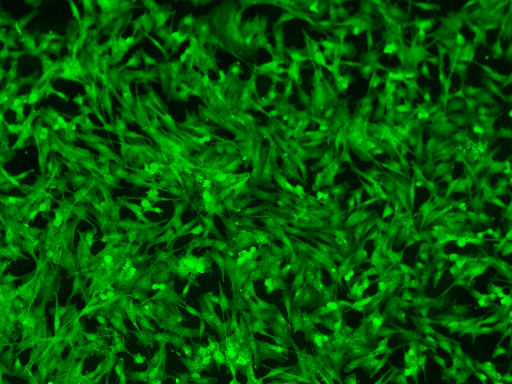

In [7]:
C.resize(small_size)

## Running the Segmentation

In [8]:
N = np.array(N)
C = np.array(C)

S_N, S_C = segment_fluor_cells(N, C, p['smooth_size'], p['intensity_curve'], p['short_th_radius'], 
                               p['long_th_radius'], p['max_size_of_small_objects_to_remove'], 
                               p['peak_min_distance'], p['size_after_watershed_to_remove'], 
                               p['cyto_local_avg_size'], zoomLev)

## Extracting Measurements

In [9]:
df = measure_fluor_cells(S_N, S_C, pix_size=0.48) #pixel size in micrometers along edge of pixel

csi = 4*np.pi * (df['Nuc_Area_um2'].values / df['Nuc_Perimeter_um'].values**2)

hist, bins = np.histogram(csi, bins=10)

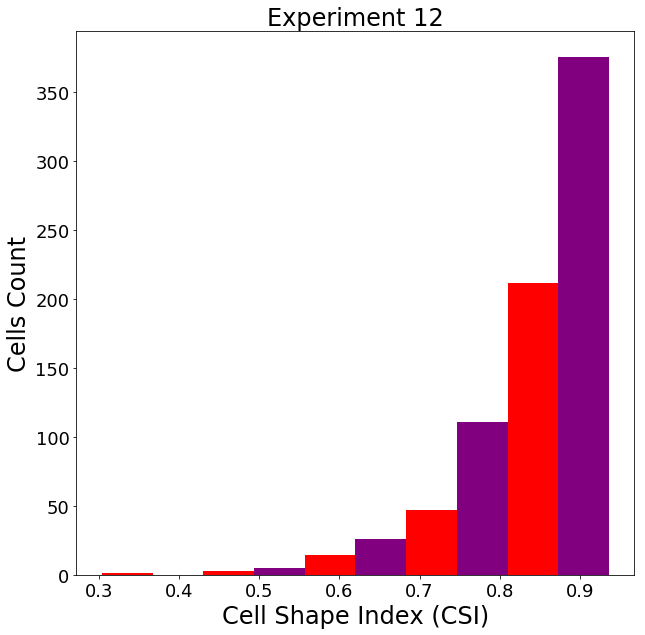

In [10]:
colors = ['red','purple']*5

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.bar(bins[:-1], hist, width=(bins[1]-bins[0]), color=colors)#, c='red')#, align='edge')
ax.set_title('Experiment %d'%n, fontsize=24)
ax.set_xlabel('Cell Shape Index (CSI)', fontsize=24)
ax.set_ylabel('Cells Count', fontsize=24)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
plt.show(fig)

In [11]:
V_N, E_N = visualize_fluor_cells(S_N, N)

V_N = Image.fromarray(V_N).resize(small_size)
E_N = Image.fromarray(E_N).resize(small_size)

V_C, E_C = visualize_fluor_cells(S_C, C)

V_C = Image.fromarray(V_C).resize(small_size)
E_C = Image.fromarray(E_C).resize(small_size)

## Showing the colored segmentations

The colors of both images correspond to each other. For each nucleus in the segmented nucleus image, the cytoskeleton was assigned an identical label and color.

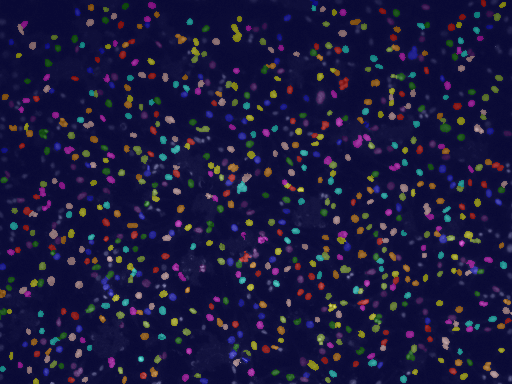

In [12]:
V = ImageEnhance.Brightness(V_N)
V.enhance(1.4)

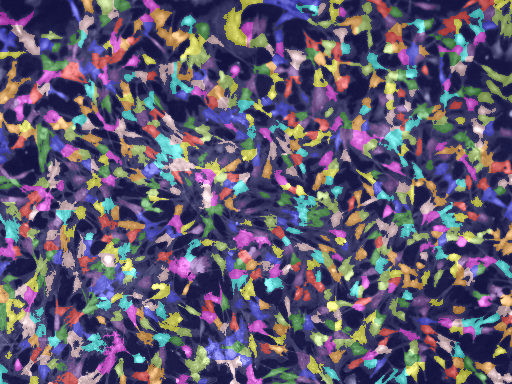

In [13]:
V = ImageEnhance.Brightness(V_C)
V.enhance(1.4)

## Showing borders

Borders are important to detect because a good border gives a better measurement. Measurements such as cell shape index (CSI) are important in identifying the type of cell. A CSI of greater than 0.8 shows that we have muscle cells, which is true for experiment 9.

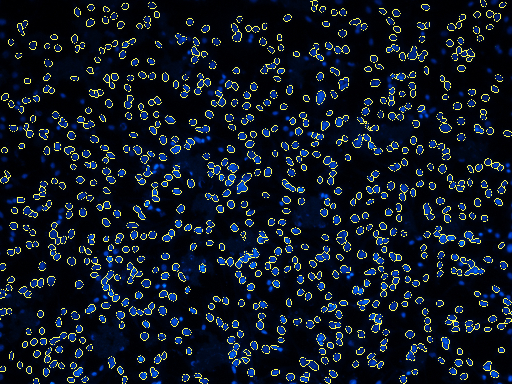

In [14]:
E_N

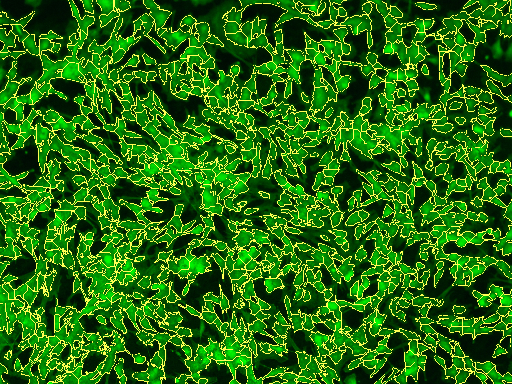

In [15]:
E_C